In [42]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [74]:
os.chdir("C:/Users/Lenovo/Documents/DL_hf/GeFace/data/")
try:
    csv_file = pd.read_csv("../data/imdb.csv",delimiter = ';', encoding = "ISO-8859-1", engine='python')
    pd.set_option('display.max_columns', 100)
except (FileNotFoundError):
    print("CSV file not found")
    current_path = os.getcwd()
    print("Current path is " + current_path)

In [16]:
csv_file.head()

,dob,photo_taken,full_path,gender,name,face_location,face_score,second_face_score,celeb_id
0,1899,1968,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0,Fred Astaire,[1072.926 161.838 1214.784 303.696],1.459693,1.118973,6488
1,1899,1970,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0,Fred Astaire,[477.184 100.352 622.592 245.76],2.543198,1.852008,6488
2,1899,1968,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0,Fred Astaire,[114.969643089629 114.969643089629 451.6865723...,3.455579,2.985660,6488
3,1899,1968,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0,Fred Astaire,[622.885505642659 424.217503837008 844.3390076...,1.872117,NaN,6488
4,1899,1968,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0,Fred Astaire,[1013.85900236037 233.882042207585 1201.586127...,1.158766,NaN,6488


In [14]:
image_dir = "C:/Users/Lenovo/Documents/DL_hf/GeFace/images/"

In [85]:
df = csv_file.drop(columns=['name', 'face_location','face_score','second_face_score','celeb_id'])

In [86]:
df['dob'] = df['photo_taken'] - df['dob']

In [87]:
df = df.drop(columns=['photo_taken'])
df = df.rename(index=str, columns={"dob": "age"})

In [91]:
df = df.query('age >= 0 and age <=100')


In [92]:
df.head()

,age,full_path,gender
0,69,01/nm0000001_rm124825600_1899-5-10_1968.jpg,1.0
1,71,01/nm0000001_rm3343756032_1899-5-10_1970.jpg,1.0
2,69,01/nm0000001_rm577153792_1899-5-10_1968.jpg,1.0
3,69,01/nm0000001_rm946909184_1899-5-10_1968.jpg,1.0
4,69,01/nm0000001_rm980463616_1899-5-10_1968.jpg,1.0


In [93]:
# Import packages for counting and plotting the histogram
from collections import Counter

In [94]:
ages = df['age']
age_counts = Counter(ages)


In [95]:
df_plot = pd.Series(age_counts).sort_index()
df_plot

0         47
1         65
2        221
3         71
4         58
5        145
6        226
7        283
8        567
9        809
10       932
11      1448
12      1642
13      2178
14      2253
15      2268
16      2835
17      3395
18      3667
19      5045
20      7107
21      8071
22      8202
23     10051
24     10031
25     12916
26     11325
27     14330
28     12622
29     15309
       ...  
71       977
72       963
73       685
74       652
75       558
76       655
77       558
78       450
79       439
80       321
81       313
82       257
83       159
84       211
85       133
86        97
87       118
88        97
89        34
90        56
91        42
92        13
93        14
94        24
95         4
96        15
97        11
98         1
99         3
100        4
Length: 101, dtype: int64

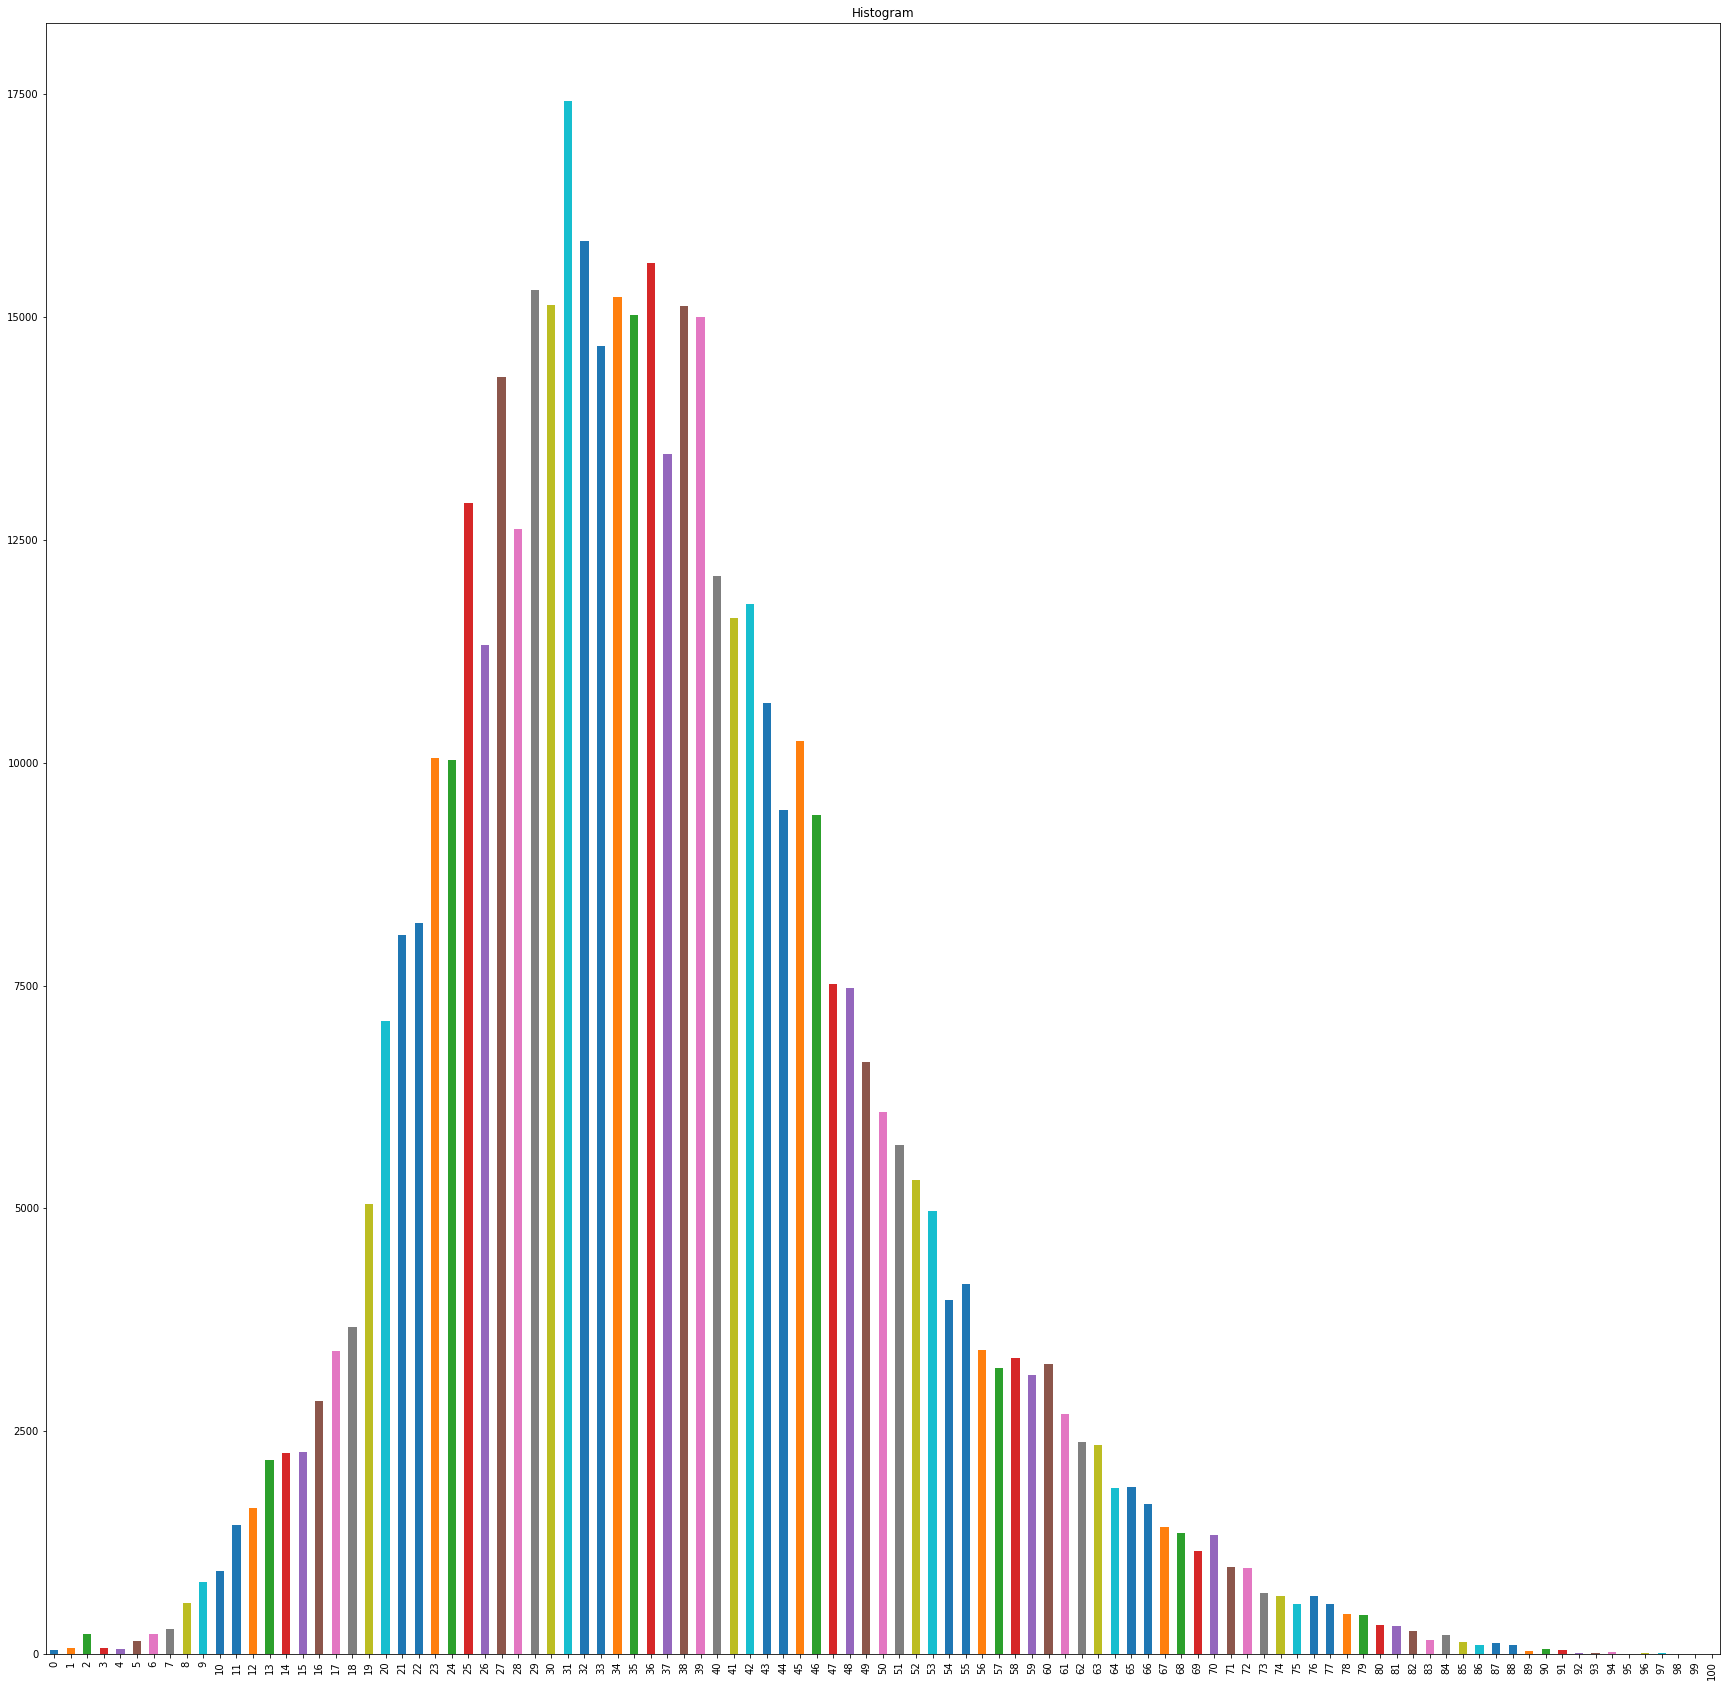

In [96]:
df_plot.plot(kind = 'bar',figsize=(30,30), title='Histogram')